# Decision Tree Classifier with Employee Attrition Dataset

In this notebook, we will build a decision tree classifier using the scikit-learn library. We will use a hypothetical employee attrition dataset for this example.

## Import Libraries
First, let's import the necessary libraries.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score


## Load and Explore the Dataset
Next, we will load the employee attrition dataset ('employee_attrition_small.csv') and explore its contents.

In [62]:
df = pd.read_csv('employee_attrition_small.csv')
print(df.to_string())
print(df.head().to_string())

      Age Attrition     BusinessTravel  DailyRate              Department    EducationField  Gender  HourlyRate                    JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  TotalWorkingYears
0      41       Yes      Travel_Rarely       1102                   Sales     Life Sciences  Female          94            Sales Executive                4        Single           5993        19479                   8      Yes                  8
1      49        No  Travel_Frequently        279  Research & Development     Life Sciences    Male          61         Research Scientist                2       Married           5130        24907                   1       No                 10
2      37       Yes      Travel_Rarely       1373  Research & Development             Other    Male          92      Laboratory Technician                3        Single           2090         2396                   6      Yes                  7
3      33       

## Preprocess the Data
We need to preprocess the data, including handling categorical variables and missing values.

In [63]:
print(df.isnull().sum())

from sklearn.calibration import LabelEncoder 

X = df.drop(columns =['Attrition','DailyRate', 'HourlyRate', 'MonthlyRate', 'MonthlyIncome'], axis = 1)
y = df['Attrition']

le = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)

print(X.shape)
print(X.columns.tolist())
print(f"\nNo Attrition: {(y==0).sum()}")
print(f"\nAttrition: {(y==1).sum()}")

Age                   0
Attrition             0
BusinessTravel        0
DailyRate             0
Department            0
EducationField        0
Gender                0
HourlyRate            0
JobRole               0
JobSatisfaction       0
MaritalStatus         0
MonthlyIncome         0
MonthlyRate           0
NumCompaniesWorked    0
OverTime              0
TotalWorkingYears     0
dtype: int64
(1470, 11)
['Age', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'TotalWorkingYears']

No Attrition: 1233

Attrition: 237


## Split the Dataset
We will split the dataset into training and testing sets.

In [64]:
# drop the outcome column

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)


(1176, 11)
(294, 11)


## Train and evaluate the Decision Tree Model
## Please not that the maximum depth shouldn't be greater than 3

In [65]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 10, random_state = 42)
dt_classifier.fit(X,y)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X)

print(y_pred_dt)

# Calculate the accuracy of the decision tree model
accuracy_dt = accuracy_score(y, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')


[0 0 0 ... 0 0 0]
Decision Tree Accuracy: 0.86


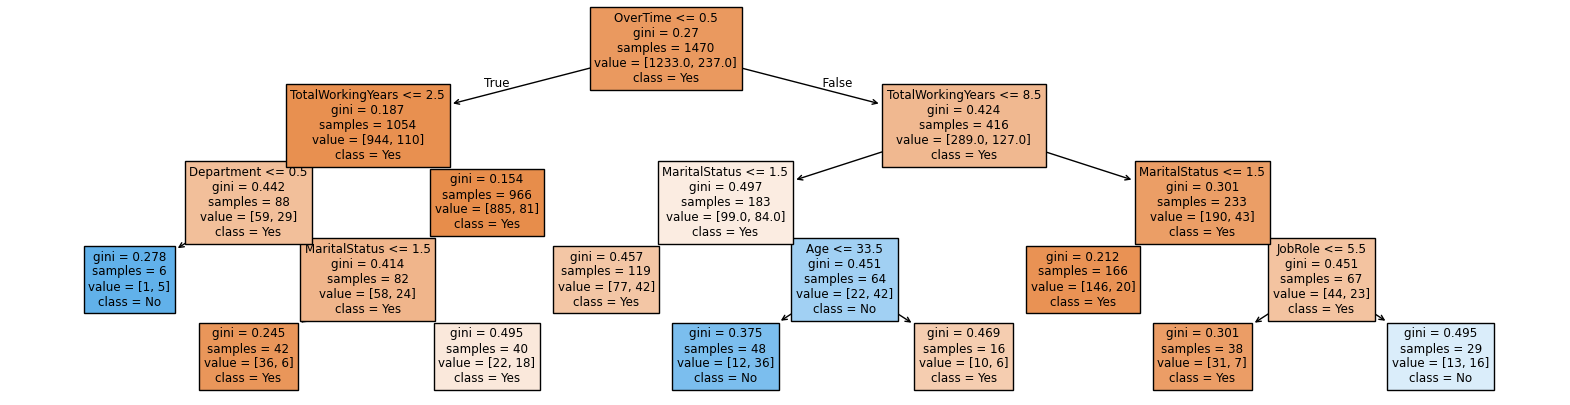

In [66]:
#Visualize the Decision Tree

#Plot the decision tree 
plt.figure(figsize =(20,5))

custom_feature_names = ['Age', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'TotalWorkingYears']
custom_class_names = ['Yes', 'No']

plot_tree(dt_classifier, feature_names = X.columns, class_names = custom_class_names, filled = True)
#plot_tree(dt_classifier, filled = True, max_depth = 4)
plt.show()